# Analysis of Movielens data for the Mini Project

## Question: How does most highly rated movie genre compare with the sci-fi genre on a year by year count for movies released?
## Are there any limitations using this specific dataset to gain greater insight?

Below will outlined an which I've used for the analysis. I'll define which key steps I've taken and the order in which they should be carried out so that the plots can be drawn showing the finds to the question posed.

* I must ensure that the date extraction is more solid.

* I need to be able to validate the data so that I don't have inaccurate data in columns, duplicates that sort of thing

* the movies data set should contain enough features so that extraction of different sub-sets for any genres doesn't require re-working the queries.

* the year should be the same for the all genres when plotting the number of films released for that year; **need to include the years from both genres only**

### Dataset generation
The files we will use are
* movies.csv
* rating.cvs

As per the readme; This dataset was generated on March 31, 2015, and updated on October 17, 2016

We need to add a '*count*' feature to the movies and extract the '*year*' as a separate feature

## Imported Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the datasets

In [2]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [3]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Cleansing

In [4]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [5]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [6]:
movies[['movieId', 'genres']].head(9)

,movieId,genres
0,1,Adventure|Animation|Children|Comedy|Fantasy
1,2,Adventure|Children|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama|Romance
4,5,Comedy
5,6,Action|Crime|Thriller
6,7,Comedy|Romance
7,8,Adventure|Children
8,9,Action


So we need to extract the year and add it to the movies as a separate column

In [7]:
movies.columns

Index([u'movieId', u'title', u'genres'], dtype='object')

In [8]:
movies['year'] = movies['title'].str.extract('\((\d{4,4})\)', expand=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [9]:
movies.columns

Index([u'movieId', u'title', u'genres', u'year'], dtype='object')

now we need the '* count *' column and we'll be fine for now; one movie per count

In [10]:
movies['count'] = 1

In [11]:
movies.columns

Index([u'movieId', u'title', u'genres', u'year', u'count'], dtype='object')

In [12]:
movies.shape

(27278, 5)

### data cleansing : duplicates, Nans, Nulls

In [13]:
movies = movies.drop_duplicates(subset = ['title', 'year'])

In [14]:
movies.shape

(27262, 5)

In [15]:
movies.isnull().any()

movieId    False
title      False
genres     False
year        True
count      False
dtype: bool

In [16]:
movies = movies.dropna()

In [17]:
movies.shape

(27240, 5)

*Sweet* as McGee would say https://en.wikipedia.org/wiki/Timothy_McGee

### What is the highest rated genre?

In [18]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [19]:
average_rating.sort_values(by='rating', ascending=0)[:10]

,movieId,rating
19152,95517,5.0
21842,105846,5.0
17703,89133,5.0
21656,105187,5.0
21658,105191,5.0
17556,88488,5.0
25936,126945,5.0
21762,105526,5.0
21763,105529,5.0
21840,105841,5.0


**Merge ratings with the movies based on their ids**

In [20]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.tail()

,movieId,title,genres,year,count,rating
26701,131254,Kein Bund für's Leben (2007),Comedy,2007,1,4.0
26702,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002,1,4.0
26703,131258,The Pirates (2014),Adventure,2014,1,2.5
26704,131260,Rentun Ruusu (2001),(no genres listed),2001,1,3.0
26705,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,1,4.0


**Now select/show the top ten rated movies**
* ratings are associated to a specific movied Id
* movie Id has a single ['Comedy'] or grouped genres ['Adventure|Animation|Children|Comedy|Fantasy']
* for the given data, their is no easy way to prove that the split in separate genres is statistical correct and can be proved to be so; especially for a mini project like this.

In [21]:
joined.sort_values(by='rating', ascending=0)[:10]

,movieId,title,genres,year,count,rating
23331,111797,This Thing With Sarah (2013),Comedy|Drama|Romance,2013,1,5.0
23894,114214,Mishen (Target) (2011),Drama|Sci-Fi,2011,1,5.0
24549,117418,Victor and the Secret of Crocodile Mansion (2012),Adventure|Children|Mystery,2012,1,5.0
26027,127256,The Old Gun (1975),Drama|Thriller|War,1975,1,5.0
21893,106076,Precision: The Measure of All Things (2013),Documentary,2013,1,5.0
21895,106082,Shock and Awe: The Story of Electricity (2011),Documentary,2011,1,5.0
21905,106113,Such Hawks Such Hounds (2008),Documentary,2008,1,5.0
26378,129478,A Blank on the Map (1971),Documentary,1971,1,5.0
26383,129516,Poison (1951),Comedy,1951,1,5.0
21906,106115,"Story of Science, The (2010)",Documentary,2010,1,5.0


Now to create the two dataframes, then merge, default inner join, giving year, sci-fi count and highest rated genres (Comedy|Drama|Romance) count, will pick 'Drama', it appears more times as a movie genre

*Create our filters for Sci-Fi **is_scifi** and Dramas **is_dramas** and filter to new dataframes, **drama_movs**, **scifi_movs***

In [22]:
is_dramas = movies['genres'].str.contains('Drama')
drama_movs = movies[is_dramas]
drama_movs.tail(15)

,movieId,title,genres,year,count
27189,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,1992,1
27191,131011,Execution Squad (1972),Crime|Drama,1972,1
27199,131027,But Forever in My Mind (1999),Comedy|Drama,1999,1
27206,131060,Vollidiot (2007),Comedy|Drama,2007,1
27207,131062,20 Years After (2008),Drama|Fantasy|Sci-Fi,2008,1
27210,131070,Forgotten (2012),Drama|Mystery|Thriller,2012,1
27236,131122,Love Exposure (2007),Action|Comedy|Drama|Romance,2007,1
27244,131138,My Führer (2007),Comedy|Drama|War,2007,1
27245,131140,Stopped on Track (2011),Drama,2011,1
27255,131160,Oscar and the Lady in Pink (2009),Drama,2009,1


In [23]:
is_scifi = movies['genres'].str.contains('Sci-Fi')
scifi_movs = movies[is_scifi]
scifi_movs.head(15)

,movieId,title,genres,year,count
23,24,Powder (1995),Drama|Sci-Fi,1995,1
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995,1
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1995,1
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,1996,1
75,76,Screamers (1995),Action|Sci-Fi|Thriller,1995,1
101,103,Unforgettable (1996),Mystery|Sci-Fi|Thriller,1996,1
158,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,1995,1
170,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,1995,1
171,173,Judge Dredd (1995),Action|Crime|Sci-Fi,1995,1
194,196,Species (1995),Horror|Sci-Fi,1995,1


**Now count the total number of films produced in that year for each genre**

In [24]:
dramas_count = drama_movs[['count', 'year']].groupby('year', as_index=False).count()
dramas_count.head(5)

,year,count
0,1909,1
1,1910,2
2,1912,3
3,1913,5
4,1914,5


In [25]:
scifi_count = scifi_movs[['count', 'year']].groupby('year', as_index=False).count()
scifi_count.head(5)

,year,count
0,1898,1
1,1902,1
2,1910,2
3,1916,1
4,1920,1


*Notice how the years differs when movies were produced in the early years*

**We have to get only the years which occur in both dfs ; drama_movs, scifi_movs**

In [26]:
joined_drama_scifi = drama_movs.merge(scifi_count, on='year', how='inner')
#joined.head(15)
joined_drama_scifi.columns

Index([u'movieId', u'title', u'genres', u'year', u'count_x', u'count_y'], dtype='object')

all dramas that were produced in the same year as the sci-fi movies

In [27]:
dramasCount = joined_drama_scifi[['count_x', 'year']].groupby('year', as_index=False).count()
#dramasCount = joined[['count_x', 'year']].groupby('year').count()
dramasCount.head(5)

,year,count_x
0,1910,2
1,1916,6
2,1920,8
3,1924,18
4,1925,19


all sci-fi movies that were produced in the same year as the dramas movies

In [28]:
joined_sfi_drama = scifi_movs.merge(dramas_count, on='year', how='inner')
#joined_sfi.head(10)

In [29]:
scifiCount = joined_sfi_drama[['count_x', 'year']].groupby('year', as_index=False).count()
scifiCount.head(5)

,year,count_x
0,1910,2
1,1916,1
2,1920,1
3,1924,1
4,1925,2


### Merge the two genres and plot

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

using http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html
plot a graph contain the two genre counts

In [31]:
mergedPlot = scifiCount.merge(dramasCount, on='year', how='inner')
mergedPlot.rename(columns={'count_x_x': 'sci-fi', 'count_x_y': 'dramas'}, inplace=True)
mergedPlot.head(5)

,year,sci-fi,dramas
0,1910,2,2
1,1916,1,6
2,1920,1,8
3,1924,1,18
4,1925,2,19


Above matches the merged years as expected, see the previous two tables above

In [32]:
mergedPlot.tail(5)

,year,sci-fi,dramas
83,2011,72,471
84,2012,62,438
85,2013,63,437
86,2014,54,315
87,2015,12,46


Now remove the partially completed year, 2015; regardless as to what the readme says

In [33]:
mergedPlot = mergedPlot.drop(mergedPlot.index[len(mergedPlot)-1])

In [34]:
#mergedPlot = mergedPlot.drop(mergedPlot.index[len(mergedPlot)-1])
mergedPlot.set_index('year', inplace=True)
#mergedPlot.rename(columns={'count_x_x': 'sci-fi', 'count_x_y': 'dramas'}, inplace=True)

In [35]:
mergedPlot.columns

Index([u'sci-fi', u'dramas'], dtype='object')

Just check and see if the last row was dropped

In [36]:
mergedPlot.tail(5)

,sci-fi,dramas
year,,
2010,55,429
2011,72,471
2012,62,438
2013,63,437
2014,54,315


** Plot the results**

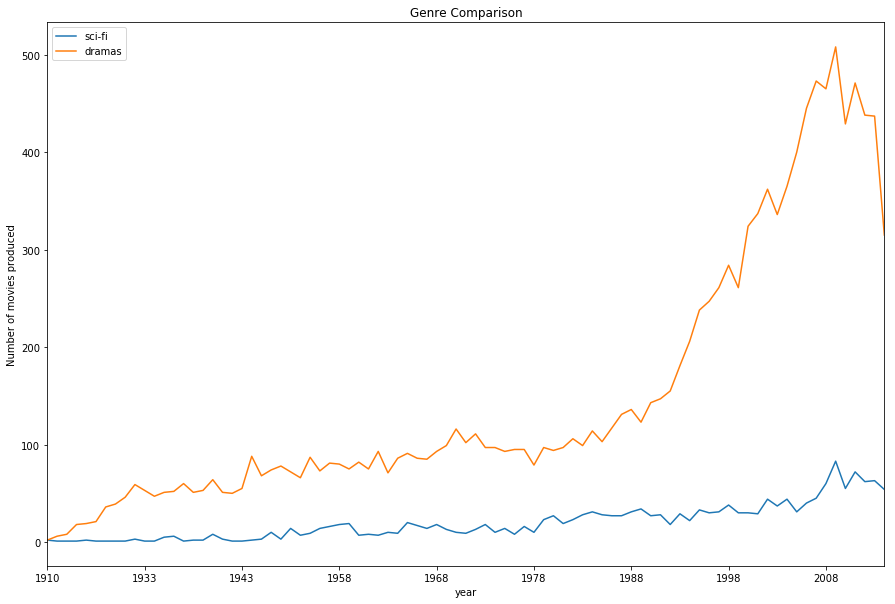

In [37]:
mp = mergedPlot.plot(kind='line', figsize=(15,10), title='Genre Comparison')
mp.set_ylabel('Number of movies produced')